In [1]:
# raytracing tutorial
# 01 - basic viewport

In [2]:
import numpy
import matplotlib.pyplot as plt

# plot images in this notebook
%matplotlib inline

In [3]:
# axes x to the right, y upwards. z into the screen (left hand rule)

In [4]:
# camera location
camera_location = numpy.array([0,0,-100])

# view port
view_port_location = numpy.array([-10, 0, 0])
view_port_width = 20
view_port_height = 20

# resolution (pixels per unit distance)
resolution = 2

In [5]:
# create image

image = numpy.zeros([view_port_width * resolution, view_port_height * resolution, 3], dtype='uint8')
print("image shape = ", image.shape)

image shape =  (40, 40, 3)


In [6]:
# main loop is to consider every pixel of the viewport

for pixel_ix in range(image.shape[0]):
    for pixel_iy in range(image.shape[1]):
        
        current_position = view_port_location + numpy.array([pixel_ix/resolution, pixel_iy/resolution, 0])
        #print("current_position", current_position)
        ray_direction_vector = current_position - camera_location
        ray_direction_vector /= numpy.linalg.norm(ray_direction_vector)
        #print(ray_direction_vector)
        
        # calculate pixel colour from vertical direction of ray
        colour = 100 + int(ray_direction_vector[1] *  3 * 255)
        image[pixel_ix, pixel_iy] = [50, 50, colour]
        
        # test overlay to show bottom left of image
        if ((pixel_ix + pixel_iy) < 10) & ((pixel_ix + pixel_iy) > 5):
            image[pixel_ix, pixel_iy] = [255, 255, 255]
            pass
        
        pass    
    pass

In [7]:
# test some image locations

print( image[39,0]  )
print( image[39,39] )
print( image[0,39]  )
print( image[0,0] )

[ 50  50 100]
[ 50  50 245]
[ 50  50 245]
[ 50  50 100]


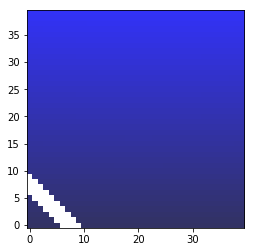

In [8]:
# transpose array so origin is bottom left, by swapping dimensions 0 and 1, but leave dimension 3

image2 = numpy.transpose(image, (1, 0, 2))
plt.imshow(image2, origin='lower')